In [1]:
!pip install hide_code
!jupyter nbextension install --py hide_code
!jupyter nbextension enable --py hide_code
!jupyter serverextension enable --py hide_code

Installing /opt/anaconda3/lib/python3.8/site-packages/hide_code/ -> hide_code
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code_preprocessor.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code_latex_exporter.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/LICENSE
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code_html_exporter.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code.js
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/auto-load.txt
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/__init__.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code_config.json
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/utils.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code/hide_code_latexpdf_exporter.py
Up to date: /usr/local/share/jupyter/nbextensions/hide_code

Enabling notebook extension hide_code/hide_code...
      - Validating: OK
Enabling: hide_code
- Writing config: /Users/lucam/.jupyter
    - Validating...
      hide_code  OK


# Un approccio Bayesiano alla disaggregazione non supervisionata e non intrusiva dei carichi 

# A Bayesian approach to unsupervised, non-intrusive load disaggregation

## Abstract

Estimating household energy use patterns and user consumption habits is a fundamental requirement for management and control techniques of demand response programs, so that non-intrusive load disaggregation methods are becoming increasingly important. In this work we propose a new methodology for disaggregating the electrical load of a household from low-frequency electrical consumption measurements obtained from a smart meter and contextual environmental information, which allows, with an unsupervised and non-intrusive approach, to separate loads into two components related to environmental conditions and occupants' habits. We use a Bayesian approach, in which disaggregation is achieved by exploiting actual electrical load information to update the a priori estimate of user consumption habits. We obtain a remarkably good accuracy for a benchmark dataset, higher than that obtained with other unsupervised methods and comparable to the values obtainable with supervised algorithms based on deep learning.

## Keywords

energy disaggregation; non-intrusive load monitoring; NILM; Bayesian methods

## Introduction

The growth in energy demand and the increased integration of generation from renewable energy, which is highly dependent on weather conditions, impose great stress on the balance of power grids and on the reliability and quality of power supply.  [tang2019model].
This drives the need to implement and enhance Demand Side Managent (DSM) systems to ensure grid balance. [qi2020smart]

In particular, Demand Response (DR) represents an advanced technology in demand management allowing users to reduce or increase their energy consumption with the aim of responding to peaks in demand or supply in the electricity market, thus allowing greater flexibility and network stability and a more efficient use of infrastructure and energy resources. [albadi2008summary].
In exchange for this availability to modify their consumption according to the needs of the energy supplier, the customer receives a remuneration.

DR programs not only benefit the operation of power grids, but also provide economic advantages to end users.  The residential sector in particular plays a very important role in DR programs and represents 40%-60% of the potential. [gils2014assessment] In fact, domestic energy consumption in Europe represents 30% of total electricity demand and is considered the third largest sector of energy use after transport and industry. Energy consumption related to heating and cooling of residential spaces accounts for half of the EU's residential energy consumption [eu2019].

Assessing DR potential is an essential prerequisite for estimating possible energy or power reduction so that DR proponents can target potential participants economically [kwac2016data], design optimal incentive schemes [adika2014demand], and implement optimal strategies [wang2017multi, qi2020smart]. In this context, estimating household energy use is a key requirement for demand response (DR) program management and control techniques. In this context and with the deployment of smart meters for all consumers, load monitoring techniques have been implemented to obtain detailed and disaggregated energy consumption information for electrical appliances [pinson2014benefits, eskander2021complementary].

Two types of monitoring can be distinguished: intrusive load monitoring (ILM) in which the energy usage of each appliance is measured separately using a dedicated sensor; and non-intrusive load monitoring (NILM) or load disaggregation, in which pattern recognition and artificial intelligence techniques are used to infer the activation status and energy consumption of appliances from the aggregate load measurement alone. [maradzadeh2020improving, aiad202020unsupervised, zeinal2020residential] The intrusive approach is difficult to apply on a large scale, due to the cost of the sensors and the processing of the generated data.

The NILM technique was introduced by Hart's pioneering work in the mid-1980s \cite{hart1992nonintrusive}. In fact, he was the first to use measured active and reactive power time series to estimate the on/off state of individual devices. Since then, the research community has proposed several approaches to disaggregation. 
A first categorization of these techniques can be made on the basis of the measurement frequency required for the aggregated power figure. 

High-frequency measurements require data with sampling rates typically from a few kHz to half a MHz. The principle is to measure voltage and current at sufficiently high sampling rates, acquired using dedicated hardware, and identify the load signatures of individual devices as in [liang2010load] \cite{elhamifar2015energy, gupta2010electrisense}. Although high-frequency approaches are very promising, it is currently not cost-effective to require such sensing capabilities and data transmission requirements from smart meters [wang2018review]. 

Low frequency measurements can be obtained directly from smart meter readings with sampling periods ranging from 1s to 1 hour. This approach has been shown to be sufficiently effective in obtaining consumption estimates for appliances with higher energy demand even if used occasionally
[kalogridis2010privacy, prudenzi2002neuron, basu2015time, basu2015nonintrusive].

Another way to categorize disaggregation algorithms is to divide them into supervised and unsupervised[faustine2017survey]. In a supervised method, the disaggregation of an unknown power signal is preceded by a training phase, where the algorithm ''learns'' to recognize individual device power signals from the aggregated signal based on available labeled data. An unsupervised method does not require such preprocessing because it processes unlabeled data and can perform disaggregation directly. 

Among the supervised methods, those based on neural networks, both for high-frequency [kelly2015neural] and low-frequency [massidda2020non] signals, have experienced considerable success in recent years. The disadvantage of supervised methods is the need for labeled data, where the time series of the total load of a household is associated with the instantaneous consumption series of appliances. These data are costly to obtain, are often not public, or are not readily generalizable to dwellings other than those in the measurement campaign. 

A review of unsupervised methods for load disaggregation can be found in [bonfigli2015unsupervised], a common approach is the factorial hidden Markov model (FHMM) [zoha2013low, kim2011unsupervised]. The most important drawback of most unsupervised methods is their requirement of a relatively high sampling rate (typically greater than 1/60 Hz), although recently the method has also been applied to low-frequency data from smart meters [ulmeanu2017hidden, liang2020separation]. 

Although recently installed smart meters have the ability to sample at the sub-minute level, most utilities only collect smart meter data at 15-, 30-, or 60-minute resolution due to the cost of communication and data storage, making many of the mentioned methodologies unusable on the utility side.[liang2019hvac].

To date, there is limited research dedicated to developing load disaggregation methods using low-resolution smart meter data. Given the low resolution of the power use data, the techniques attempt to separate consumption by type, with a focus on thermal type loads and base loads (non-temperature sensitive). 

Albert and Rajagopal proposed in [albert2015thermal] a Hidden Markov Model (HMM) to convert hourly kWh data into thermal states to identify suitable demand response resources using thermostatically controlled appliances. A sequential algorithm for energy disaggregation of the thermal component of the load from 30-minute time resolution data is proposed in [liang2019hvac].

Another approach to modeling a building's heating and cooling energy consumption is to model its dependence on weather conditions [zhao2012review]. 
Regression methods disaggregate the thermal component by regressing energy consumption on the temperature based on the breakpoint model [birt2012disaggregating] or the static equivalent thermal parameter (ETP) model [chen2016demand, pardo2012temperature], assuming a linear relationship between energy consumption for room air conditioning and room temperature [iyengar2018watthome]. A Fourier series-based regression method was proposed in [niu2018data] to decompose the whole-house load into a non-temperature-sensitive component described by sine and cosine functions, as well as a temperature-sensitive component modeled as a linear function of temperature. 

Zhao et al [zhao2018electricity] address the disaggregation problem on both 15 min and 1 h electrical measurements via the supervised K Nearest Neighbors algorithm. The same algorithm was used to disaggregate consumption based only on monthly consumption by comparison with disaggregated consumption of sample users equipped with appliance-level sub-metering [batra2016gemello].
Recently, Culière et al. proposed a Bayesian model of temperature-conditioned electricity consumption that allows disaggregating the heating component from the electric load curve in an unsupervised manner, based on daily consumption detected by smart meters [culiere2020bayesian].

In this paper we propose a new methodology for the disaggregation of the electrical load of a domestic user starting from the measurements of low frequency energy consumption obtained from a smart meter and environmental context information that allows, with an unsupervised and non-intrusive approach, to separate consumption into two parts: one related to thermal consumption, linked to environmental conditions (which can be modulated by exploiting the thermal inertia of buildings with home automation systems) and the remaining part related to occupants' habits (which can be partially exploited in a Demand Response program through deferred activations of appliances).
It is a Bayesian approach, where disaggregation is performed by exploiting the information on consumption obtained from the smart meter to update the a priori information about users' consumption habits.
We also propose an unsupervised methodology for the prior calculation with a technique derived from Approximate Bayesian Computation (ABC).
Finally, we apply the proposed method to the disaggregation of the loads of a house for which sub-metering data are available, thus allowing us to verify the achievable accuracy.

In the remainder of the paper we will first present the method in Section X, the case examined will be described in Section Y, where the metrics used to calculate the accuracy will also be presented, in Section Z we will present the results and discuss them in Section W before presenting our conclusions.

- Tang, Rui, and Shengwei Wang. "Model predictive control for thermal energy storage and thermal comfort optimization of building demand response in smart grids." Applied Energy 242 (2019): 873-882.
- Albadi, Mohamed H., and Ehab F. El-Saadany. "A summary of demand response in electricity markets." Electric power systems research 78, no. 11 (2008): 1989-1996.
- Kolokotsa, D. E. K. D., D. Rovas, E. and Kosmatopoulos, and K. Kalaitzakis. "A roadmap towards intelligent net zero-and positive-energy buildings." Solar energy 85, no. 12 (2011): 3067-3084.
- Gils, Hans Christian. "Assessment of the theoretical demand response potential in Europe." Energy 67 (2014): 1-18.
- Pinson, Pierre, and Henrik Madsen. "Benefits and challenges of electrical demand response: A critical review." Renewable and Sustainable Energy Reviews 39 (2014): 686-699.
- Tang, Rui, Shengwei Wang, Kui Shan, and Howard Cheung. "Optimal control strategy of central air-conditioning systems of buildings at morning start period for enhanced energy efficiency and peak demand limiting." Energy 151 (2018): 771-781.
- European Commission. 2019. Commission Delegated Regulation (EU) 2019/826 of 4 March 2019 amending Annexes VIII and IX to Directive 2012/27/EU of the European Parliament and of the Council on the contents of comprehensive assessments of the potential for efficient heating and cooling. https://eur-lex.europa.eu/eli/reg_del/2019/826/oj. Official Journal of the European Union (2019). Online; accessed 12 February 2022. 
- Kwac, Jungsuk, and Ram Rajagopal. "Data-driven targeting of customers for demand response." IEEE Transactions on Smart Grid 7, no. 5 (2015): 2199-2207.
- Adika, Christopher O., and Lingfeng Wang. "Demand-side bidding strategy for residential energy management in a smart grid environment." IEEE Transactions on Smart Grid 5, no. 4 (2014): 1724-1733.
- Wang, Fei, Lidong Zhou, Hui Ren, Xiaoli Liu, Saber Talari, Miadreza Shafie-khah, and Joao PS Catalao. "Multi-objective optimization model of source–load–storage synergetic dispatch for a building energy management system based on TOU price demand response." IEEE Transactions on Industry Applications 54, no. 2 (2017): 1017-1028.
- Qi, Ning, Lin Cheng, Helin Xu, Kuihua Wu, XuLiang Li, Yanshuo Wang, and Rui Liu. "Smart meter data-driven evaluation of operational demand response potential of residential air conditioning loads." Applied Energy 279 (2020): 115708.
- Eskander, Monica M., and Carlos A. Silva. "A complementary unsupervised load disaggregation method for residential loads at very low sampling rate data." Sustainable Energy Technologies and Assessments 43 (2021): 100921.
- Moradzadeh, A., Sadeghian, O., Pourhossein, K., Mohammadi-Ivatloo, B., & Anvari-Moghaddam, A. (2020). Improving residential load disaggregation for sustainable development of energy via principal component analysis. Sustainability, 12(8), 3158.
- Aiad, M.; Lee, P.H. Unsupervised approach for load disaggregation with devices interactions. Energy Build. 2016, 116, 96–103.
- Zeinal-Kheiri, S.; Shotorbani, A.M.; Mohammadi-Ivatloo, B. Residential Load Disaggregation Considering State Transitions. IEEE Trans. Ind. Inform. 2020, 16, 743–753.
- N.F. Esa, M.P. Abdullah, M.Y. Hassan, A review disaggregation method in non-intrusive appliance load monitoring, Renew. Sustain. Energy Rev. 66 (2016) 163–173. 
- J. Liang, S.K.K. Ng, G. Kendall, J.W.M. Cheng, Load signature study—Part I: Basic concept, structure, and methodology, IEEE Trans. Power Deliv. 25 (2) (2010) 551–560. 
- Y. Wang, Q. Chen, T. Hong, C. Kang, Review of smart meter data analytics: Applications, methodologies, and challenges, IEEE Trans. Smart Grid (2018) 1.
- A. Faustine, N.H. Mvungi, S. Kaijage, K. Michael, A survey on non-intrusive load monitoring methodies and techniques for energy disaggregation problem, 2017, arXiv:1703.00785. 
- Kelly, Jack, and William Knottenbelt. "Neural nilm: Deep neural networks applied to energy disaggregation." In Proceedings of the 2nd ACM international conference on embedded systems for energy-efficient built environments, pp. 55-64. 2015.
- Massidda, Luca, Marino Marrocu, and Simone Manca. "Non-intrusive load disaggregation by convolutional neural network and multilabel classification." Applied Sciences 10, no. 4 (2020): 1454.
- A. Zoha, A. Gluhak, M. Nati, M.A. Imran, Low-power appliance monitoring using factorial hidden Markov models, in: 2013 IEEE Eighth Interna- tional Conference on Intelligent Sensors, Sensor Networks and Information Processing, IEEE, 2013, pp. 527–532. 
- H. Kim, M. Marwah, M. Arlitt, G. Lyon, J. Han, Unsupervised disaggregation of low frequency power measurements, in: Proceedings of the 2011 SIAM International Conference on Data Mining, Society for Industrial and Applied Mathematics, Philadelphia, PA, 2011, pp. 747–758. 
- Ulmeanu AP,Barbu􏱓S,Tanasiev􏱓,BadeaA. Hidden Markov models revealing the household thermal profiling from smart meter data. Energy Build 2017
- Liang H,MaJ. Separation of residential space cooling usage from smart meter data. IEEE Trans Smart Grid 2020
- Liang, Ming, Yao Meng, Ning Lu, David Lubkeman, and Andrew Kling. "HVAC load disaggregation using low-resolution smart meter data." In 2019 IEEE Power & Energy Society Innovative Smart Grid Technologies Conference (ISGT), pp. 1-5. IEEE, 2019.
- A. Albert and R. Rajagopal, “Thermal Profiling of Residential Energy Use,” IEEE Transactions on Power Systems, vol. 30, no. 2, pp. 602–611, Mar. 2015.
- B.J. Birt, G.R. Newsham, I. Beausoleil-Morrison, M.M. Armstrong, N. Saldanha, I.H. Rowlands, Disaggregating categories of electrical energy end-use from whole-house hourly data, Energy Build. 50 (2012) 93–102. 
- Chen X,  Demand response potential evaluation for residential air conditioning loads. IET Gener Transm Distrib  2016
- Pardo A, Meneu  Temperature and seasonality influences on Spanish electricity load. Energy Econ 2012 
- Iyengar, S., Lee, S., Irwin, D., Shenoy, P., & Weil, B. (2018, July). Watthome: A data-driven approach for energy efficiency analytics at city-scale. In Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (pp. 396-405).
- Niu F, O’Neill , O’Neill C. Data-driven based estimation of HVAC energy consumption using an improved Fourier series decomposition in buildings. Build Simul. Springer 2018 
- B. Zhao, L. Stankovic, V. Stankovic, Electricity usage profile disaggre- gation of hourly smart meter data, in: 4th International Workshop on Non-Intrusive Load Monitoring, 2018. 
- N. Batra, A. Singh, K. Whitehouse, Gemello, in: Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, KDD ’16, ACM Press, New York, New York, USA, 2016, pp. 431–440. 
- Culière, François, Laetitia Leduc, and Alexander Belikov. "Bayesian model of electrical heating disaggregation." In Proceedings of the 5th International Workshop on Non-Intrusive Load Monitoring, pp. 25-29. 2020.

## Method

The load of a hypothetical house can be decomposed into two components that will be called base load and thermal load. The thermal load includes electrical demand related to heating and cooling and is characterized by seasonal variability during the year as well as by daily and weekly variability related to the habits of the occupants of the house. The base load includes all other elements of energy consumption and is not directly dependent on weather conditions, but only on the activities of the occupants of the house, it is characterized by a daily and weekly variability and we assume not by an annual seasonality.

Consider to have the total household energy consumption for a period of at least one year with a temporal resolution of one hour, indicated with $l$, we call $l_b$ and $l_t$ the basic and thermal components. We can write:

$$
l(h, d) = l_b(h) + l_t(h, d, T) + \epsilon
$$

where $h$ denotes the time of day, $d$ denotes the day, and $T$ is the average daily temperature outside the house. The components of the decomposition are then defined as a function of the time of day and the external temperature, so we omit the dependence of the base load on the day of the week or other calendar-type factors, such as holidays, and as for the influence of the external environment we consider only the temperature, which is certainly the most important environmental variable. All the factors not considered in the decomposition determine the error $\epsilon$.

### Base load calculation

The problem of load disaggregation cannot be solved by examining one piece of data at a time in the time series, but must be approached by somehow exploiting knowledge of the annual cycles, and making assumptions about the composition of the load itself.

We then consider the daily average load $bar{l}$, this will vary throughout the year, depending on the environmental conditions outside the home.

$$
\bar{l}(d) = \frac{1}{24} \sum_{h=0}^{23} l(h, d) \approx \frac{1}{24} \sum_{h=0}^{23} l_b(h) + \frac{1}{24} \sum_{h=0}^{23} l_t(h, d, T) 
$$

$$
\bar{l}(d) \propto \bar{l_t}(d, T)
$$

The average daily consumption, with the assumptions made, will not depend on the base load but only on the thermal load. For a house equipped with electrical devices for heating there will be an increase in average daily consumption in the periods with colder weather conditions, if equipped with cooling systems the average daily energy use will increase during the hottest periods of the year. The average energy demand will be zero for mild temperatures, when there is no need for air conditioning systems. So from the knowledge of the annual profile of average daily load we can select the periods of the year when the daily heat load can be considered null, in those days the base load will be equal to the total load.

In order to identify the periods of the year with minimum heat load it is possible to operate as follows:

1. for each day of the time series of the load to be analyzed, the average daily load $\bar{l}(d)$ and the average outdoor temperature on day $T$ are calculated,
2. the range of temperature variation is divided into intervals,
3. the days are divided into groups corresponding to the temperature intervals,
4. the average consumption for each temperature interval is calculated,
5. the temperature interval $\Delta T_{min}$ for which the average load is minimum is identified,
6. the set of days corresponding to this range is indicated by $d_{min}$.

Having identified the days of $d_{min}$ it is assumed on these days a zero thermal load. From the distribution of the values assumed by the aggregate load for the days with zero thermal load, it will therefore be possible to characterize the base load both by its average value and by the distribution $p(l_b)$ of its values as a function of the time of day

$$
p(l_b)(h) = p(l)(h, d, T) \; \; \text{if} \, d \ in d_{min} 
$$



### Thermal load calculation

At this point it is possible to proceed with the estimation of the remaining part of the total load, represented by the thermal load $l_t$ starting from the knowledge of the total load and from the previously made estimate of the base load.

Taking advantage of Bayes' rule it is defined:

$$
p(l_t|l) = \frac{p(l|l_t) \, p(l_t)}{p(l)}
$$

where $p(l_t|l)$ is the probability of having a thermal load $l_t$ for a given value of the total load $l$, called posterior; $p(l|l_t)$ represents the likelihood, the probability of having a total load $l$ when the thermal load $l_t$ is known; $p(l_t)$ represents the prior, the a priori knowledge of the heat load $l_t$, without knowing the actual value of the total load $l$ at a given time; finally $p(l)$ is the normalization factor, the probability that a given value from the total load $l$ will occur for any value of $l_t$. This expression allows us to update the a priori estimate about the load distribution $l_t$ at a given instant based on the knowledge of the total load $l$ at that time. 

The likelihood calculation takes the form of estimating the probability distribution of the total load known the value of the thermal load. Given the base load distribution $p(l_b)$ the following can be calculated:

$$
p(l|l_t) = p(l_b) \; \; \text{if} \; l_b = l - l_t
$$

Hence the probability distribution of the total load will be equal to the distribution of the base load translated by a given value of the thermal load.

According to the Bayesian approach, the prior represents our beliefs about the possible values assumed by the heat load, prior to knowing the value of the total load at a given instant. The estimation of the prior affects the accuracy of the a posteriori estimation. We will discuss the calculation of the prior in the following section.

For the normalization term, it is necessary to calculate the probability of a given total load $l$ for all possible values of the heat load $l_t$.

$$
p(l) = \int p(l|l_t) \, p(l_t) \, d l_t
$$





### Calculation of the thermal load prior

To obtain an estimate of the prior distribution of the heat load, it is assumed that this distribution is characterized by a parametric form of probability density, e.g., a truncated normal, described not only by the mean and variance, but also by the lower and upper bounds:

$$
p(l_t; \mu, \sigma, a, b) = \frac{1}{\sigma} \frac{\phi \left(\frac{l_t - \mu}{\sigma}\right)}{\Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)} \, ,
$$

where:

$$
\phi(x) = \frac{1}{\sqrt{2\pi}}\text{exp}\left( -\frac{1}{2} x^2 \right) \, ,
$$

is the probability density function of the standard normal distribution, while:

$$
\Phi(x) = \frac{1}{2} \left( 1 + \text{erf} \left( x / \sqrt{2}\right)\right)
$$

the parameters $\mu$ and $\sigma$ are the mean and standard deviation of the distribution, and $a$ and $b$ are the bounds on the range of possible values of $l_t$.

Having fixed the limits of the interval, Bayes' rule can be applied to estimate the remaining parameters $\mu$ and $\sigma$:

$$
p(\mu, \sigma|l) \propto p(l|\mu, \sigma) \, p(\mu, \sigma),
$$

where $p(\mu, \sigma|l)$ represents the probability density function of the two parameters given the values of the total load, $p(l | \mu, \sigma)$ is the probability density of the resulting total load, given the parameters of the heat load distribution, and represents, in a probabilistic sense, the distance between the simulation of the parametric model and the corresponding observations; finally $p(\mu, \sigma)$ represents the a priori probability density function for the two parameters.

Using Approximate Bayesian Computation (ABC) [csillery2010approximate, sunnaker2013approximate], with a rejection algorithm, an estimate of the prior can be derived from knowledge of the total load and base load distributions. In this procedure no specific information about the present air conditioning systems and their consumption distribution is assumed.

The procedure applied is the following:

1. A set of parameter points is first sampled from the a priori distribution. 
2. Given a sampled point $(\hat{mu}, \hat{\sigma})$, a dataset $\hat{l}$ is then simulated under the statistical model specified by $(\hat{mu}, \hat{\sigma})$. 
3. If the generated $\hat{l}$ value is too different from the observed $l$ data, the sampled parameter value is discarded. 

The result of the ABC rejection algorithm is a sample of parameter values approximately distributed according to the desired posterior distribution, and, most importantly, obtained without the need to explicitly evaluate the likelihood function.

More precisely, $\hat{l}$ is accepted with tolerance $\epsilon \geq 0$ if: $\rho(\hat{l},l) \leq \epsilon$, where the distance measure $\rho(\hat {l}, D)$ determines the level of discrepancy between $\hat{l}$ and D based on a given metric. 
Thus the ABC rejection algorithm has been implemented for our case, the a priori distributions of $\mu$ and $\sigma$ are uniform distributions in the interval $(a,b)$, the distance between the simulated and observed distributions is measured by the Kullback-Leibler divergence [kullback1951on] $\rho(\hat{l}, l) = D_{KL}(\hat{l}, l)$, and the simulated distribution of the total load is obtained by adding to a sample of the truncated normal distribution a sample of the previously calculated base load distribution.

### Disaggregation

Applying the described procedure it is possible to estimate a probability distribution of the heat load $l_t$ from the instantaneous value of the total load $l$ for all the instants of a time series of the load of a household. Given the value of the distribution, the disaggregated thermal load is equal to the expected value of the resulting probability distribution.

$$
\hat{l}_t = \mathbf{E}(p(l_t))
$$

The base load component can then be calculated as:

$$
\hat{l}_b = l - \hat{l}_t
$$


- Csilléry, K; Blum, MGB; Gaggiotti, OE; François, O (2010). "Approximate Bayesian Computation (ABC) in practice". Trends in Ecology & Evolution. 25 (7): 410–418. doi:10.1016/j.tree.2010.04.001. PMID 20488578.
- Sunnåker M, Busetto AG, Numminen E, Corander J, Foll M, Dessimoz C (2013) Approximate Bayesian Computation. PLoS Comput Biol 9(1): e1002803. https://doi.org/10.1371/journal.pcbi.1002803
- Kullback, S.; Leibler, R.A. (1951). "On information and sufficiency". Annals of Mathematical Statistics. 22 (1): 79–86. doi:10.1214/aoms/1177729694. JSTOR 2236703. MR 0039968.

## Experimental setup

The proposed methodology is now applied to the AMPds dataset, which is freely available and already discussed in the literature [makonin2016electricity]. AMPds contains electricity, water, and natural gas measurements at one-minute intervals for a residence located in the Greater Vancouver metropolitan area of British Columbia (Canada) for the years 2012 to 2014, to which meteorological data measured by a station located near the house is added.

The user consists of a main house, inhabited by a family nucleus consisting of 2 adults both employed and one child, and an annex rented to an adult with full-time employment.  The analysis will be limited to the main house (whose consumption is referred to in the dataset as MHE). The Heating, Ventilation, and Air Conditioning system (HVAC) consists of a heat pump and a forced-air gas furnace. The heat pump cools the house in the summer and heats it in the winter. The furnace is activated when the outside temperature is too low for the heat pump to operate effectively. During data collection, the HVAC thermostat was set to a constant heating set-point of 21 °C and the cooling set-point varied between 24-26 °C. 

The dataset contains measurements not only of overall electrical consumption but also readings from sub-meters dedicated to the main appliances in the house. The proposed methodology is unsupervised, so the only data needed are those related to the time series of total power demand and outdoor temperatures, but having the electrical consumption of the appliances enables to test the accuracy obtained with the disaggregation methodology. 

From the analysis of the total load it is possible to verify a strong dependence on the conditions of the consumption related to a heat pump $l_{hp}$. In addition the residual load portion, not directly monitored, $l_{un}$, also had a strong seasonal component and was therefore treated together with the heat pump load. The thermal component was calculated as the sum of these two components $p(l_{t}) = p((l_{hp} + l_{un})$ minus of course the component not dependent on ambient conditions which is instead attributed to the base load.

- Makonin, S., Ellert, B., Bajic, I. V., and Popowich, F. (2016). Electricity, water, and natural gas consumption of a residential house in Canada from 2012 to 2014. Scientific Data, 3(160037):1-12. doi: 10.1038/sdata.2016.37.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm, rv_histogram, uniform
import joypy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import properscoring as ps
import datetime

In [3]:
from IPython import display
display.Image('https://matplotlib.org/stable/_images/sphx_glr_named_colors_002_2_0x.png')

HTTPError: HTTP Error 404: Not Found

In [ ]:
colors = {
    'total': 'tab:gray',
    'base' : 'tab:blue',
    'thermal': 'tab:red', 
    'HPE' : 'tab:brown',
    'UNE' : 'tab:olive',
    'FRE' : 'tab:purple',
    'prior_base' : 'tab:orange',
    'prior_thermal' : 'tab:green',
    'posterior_base' : 'tab:orange', 
    'posterior_thermal' : 'tab:green'
}

In [ ]:
dfe = pd.read_csv('Electricity_P.csv')
dfe['date'] = pd.to_datetime(dfe['UNIX_TS'], unit='s')
dfe.set_index('date', inplace=True)
dfe.drop(labels='UNIX_TS', axis=1, inplace=True)

In [76]:
dfw = pd.read_csv('Climate_HourlyWeather.csv')
dfw['date'] = pd.to_datetime(dfw['Date/Time'])
dfw.set_index('date', inplace=True)
dfw.drop(labels='Date/Time', axis=1, inplace=True)

In [77]:
df = pd.concat([dfe, 
                dfw['Temp (C)'].reindex_like(dfe).interpolate().bfill().ffill().rename('T'), 
                dfw['Dew Point Temp (C)'].reindex_like(dfe).interpolate().bfill().ffill().rename('D'), 
                dfw['Wind Spd (km/h)'].reindex_like(dfe).interpolate().bfill().ffill().rename('W'), 
                dfw['Stn Press (kPa)'].reindex_like(dfe).interpolate().bfill().ffill().rename('P'), 
               ], axis=1)
df = df.tz_localize('UTC').tz_convert('Canada/Pacific')
dfq = df.resample('15min').mean() # media quartoraria
dfh = df.resample('1h').mean() # media oraria
dfd = df.resample('1d').mean() # media giornaliera
dfq['T'] = dfd['T'].reindex_like(dfq).ffill().bfill() 
dfh['T'] = dfd['T'].reindex_like(dfh).ffill().bfill() 
# la temperatura per il dataframe con campionamento orario 
# è sotto campionata alla temperatura media giornaliera

In [78]:
nT = 12
df['Tbin'] = pd.qcut(dfd['T'].reindex_like(df).ffill().bfill(), nT, labels=range(nT))
dfq['Tbin'] = pd.qcut(dfq['T'], nT, labels=range(nT))
dfh['Tbin'] = pd.qcut(dfh['T'], nT, labels=range(nT))
dfd['Tbin'] = pd.qcut(dfd['T'], nT, labels=range(nT))

#tbins = np.arange(-4,22,2)
#df['Tbin']  = pd.cut(dfd['T'].reindex_like(df).ffill().bfill(), np.arange(-5,23,2), labels=tbins)
#dfq['Tbin'] = pd.cut(dfq['T'], np.arange(-5,23,2), labels=tbins)
#dfh['Tbin'] = pd.cut(dfh['T'], np.arange(-5,23,2), labels=tbins)
#dfd['Tbin'] = pd.cut(dfd['T'], np.arange(-5,23,2), labels=tbins)
#df.dropna(inplace=True)
#dfq.dropna(inplace=True)
#dfh.dropna(inplace=True)
#dfd.dropna(inplace=True)

Tm = df['T'].groupby(df['Tbin']).mean().values
Tmq = dfq['T'].groupby(dfq['Tbin']).mean().values
Tmh = dfh['T'].groupby(dfh['Tbin']).mean().values
Tmd = dfd['T'].groupby(dfd['Tbin']).mean().values

The following graph shows the average daily consumption according to the external temperature. It can be seen that consumption is minimal for temperatures around 16° and increases both for higher temperatures, when the room cooling system is used, and for lower temperatures, when the heat pumps are used to heat the rooms. It is also evident the decrease in consumption below 6°C, linked to the use of the fossil fuel heating system with which the house is equipped.

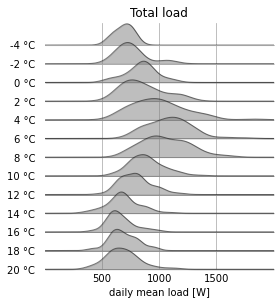

In [79]:
joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['MHE'], 
              linewidth=1, legend=False, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,2000], figsize=(4,4), 
              ylim='own', overlap=0.2, color=colors['total']);
plt.xlabel('daily mean load [W]');
plt.title('Total load');
plt.savefig('total', dpi=300, bbox_inches='tight', pad_inches=0.1)

The following figure shows the distributions of the average daily consumption of heat pump and non-monitored loads, indicated with HPE and UNE in the AMPd dataset.

It can be seen that the heat pump consumption is equal to the standby consumption between 14 and 18°C, it increases as the temperature decreases until 6°C, at the same rate the variability of daily consumption also increases. Below 6°C, average consumption decreases rapidly until it is again equal to standby consumption for temperatures below 0°C. There is also an increase in consumption for temperatures around 20°C certainly linked to the use of the heat pump in cooling mode.

On the other hand, non-monitored consumption is minimal and with modest variability for external temperatures above 10°C, while it increases for lower temperatures, probably due to greater use of additional heating equipment.

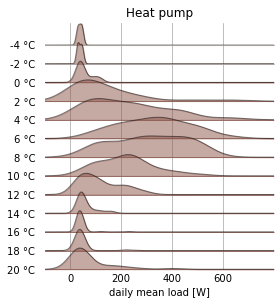

In [80]:
dfd['heat pump'] = dfd['HPE'] + 10*np.random.randn(len(dfd))

joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['heat pump'], 
              linewidth=1, legend=False, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[-100,800], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['HPE']);
plt.xlabel('daily mean load [W]');
plt.title('Heat pump');
plt.savefig('heatpump', dpi=300, bbox_inches='tight', pad_inches=0.1)

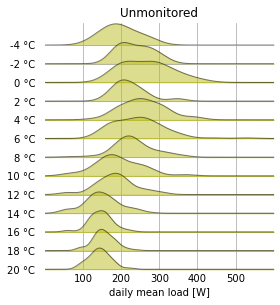

In [81]:
dfd['unmonitored'] = dfd['UNE']

joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['unmonitored'], 
              linewidth=1, legend=False, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,600], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['UNE']);
plt.xlabel('daily mean load [W]');
plt.title('Unmonitored');
plt.savefig('unmonitored', dpi=300, bbox_inches='tight', pad_inches=0.1)

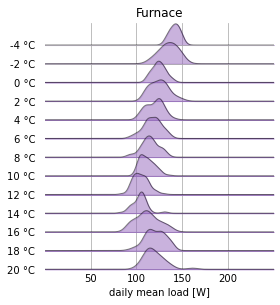

In [82]:
dfd['furnace'] = dfd['FRE']

joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['furnace'], 
              linewidth=1, legend=False, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,250], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['FRE']);
plt.xlabel('daily mean load [W]');
plt.title('Furnace');
plt.savefig('furnace', dpi=300, bbox_inches='tight', pad_inches=0.1)

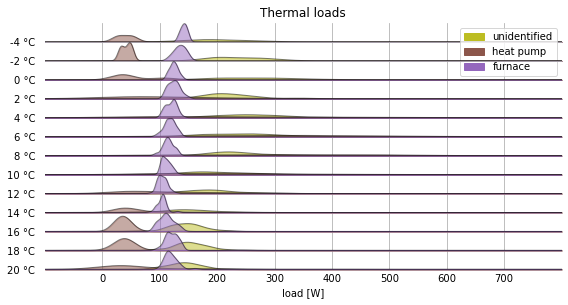

In [83]:
dfd['heat pump'] = dfd['HPE'] + 10*np.random.randn(len(dfd))
dfd['unidentified'] = dfd['UNE']
dfd['furnace'] = dfd['FRE']

joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['unidentified', 'heat pump', 'furnace'], 
              linewidth=1, legend=True, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[-100,800], figsize=(8,4), 
              ylim='same', overlap=0.8, color=[colors['UNE'], colors['HPE'], colors['FRE']]);
plt.xlabel('load [W]');
plt.title('Thermal loads');
#plt.savefig('thermal', dpi=300, bbox_inches='tight', pad_inches=0.1)

The thermal load is therefore given by the sum of these two components, net of their minimum value. This subtracts the non-thermal part of the unmonitored load and the constant part of the heat pump load likely due to stand-by operation and ventilation.
The series thus constructed will be used to verify the accuracy of the proposed disaggregation procedure.

The following figure shows the distributions of base and thermal loads measured at hourly resolution, as a function of time of day when the temperature outside the house is in the range [5°C - 7°C].

In [84]:
(dfd['HPE'] + dfd['UNE'] + dfd['FRE']).groupby(dfd['Tbin']).mean()

Tbin
0     456.219274
1     552.755017
2     674.104895
3     725.862942
4     673.098102
5     565.599549
6     473.919080
7     366.703732
8     312.714595
9     298.672074
10    318.527106
11    372.031796
dtype: float64

In [85]:
lt_min = np.zeros(24)
for h in range(24):
    lt_min[h] = (dfh['HPE'] + dfh['UNE'] + dfh['FRE'])[(dfh.index.hour==h) & (dfh['Tbin']==9)].mean()#.min()
lt = (dfh['HPE'] + dfh['UNE'] + dfh['FRE']) - lt_min[dfh.index.hour]
lb = dfh['MHE'] - lt #+ lt_min[dfh.index.hour]

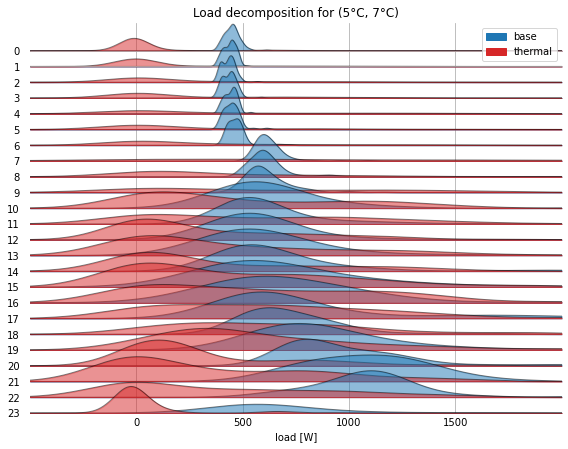

In [86]:
dfh['thermal'] = lt
dfh['base'] = lb
joypy.joyplot(dfh[(dfh['T']>5) & (dfh['T']<7)], by=dfh[(dfh['T']>5) & (dfh['T']<7)].index.hour, column=['base', 'thermal'], 
              linewidth=1, legend=True, x_range=[-500,2000],
              fade=False, alpha=0.5, grid=True, figsize=(8,6),
              ylim='own', overlap=0.8, color=[colors['base'], colors['thermal']]);
plt.xlabel('load [W]');
plt.title('Load decomposition for (5°C, 7°C)');
#plt.savefig('decomposition', dpi=300, bbox_inches='tight', pad_inches=0.1)

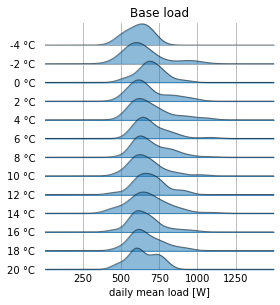

In [87]:
dfd['base'] = lb.resample('1d').mean()

joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['base'], 
              linewidth=1, legend=False, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,1500], figsize=(4,4), 
              ylim='own', overlap=0.2, color=colors['base']);
plt.xlabel('daily mean load [W]');
plt.title('Base load');
plt.savefig('base', dpi=300, bbox_inches='tight', pad_inches=0.1)

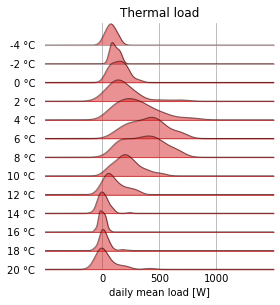

In [88]:
dfd['thermal'] = lt.resample('1d').mean()

joypy.joyplot(dfd, by=pd.cut(dfd['T'], np.arange(-5,23,2)), column=['thermal'], 
              linewidth=1, legend=False, labels=[f'{t} °C' for t in np.arange(-4,22,2)], 
              fade=False, alpha=0.5, grid=True, x_range=[-500,1500], figsize=(4,4), 
              ylim='own', overlap=0.2, color=colors['thermal']);
plt.xlabel('daily mean load [W]');
plt.title('Thermal load');
plt.savefig('thermal', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Evaluation metrics

Disaggregation accuracy may be measured by Mean Absolute Error (MAE) expressed as:

$$
MAE = \frac{1}{N} \sum_{t=1}^N |l(t) - \hat{l}(t)| ,
$$

where $N$ denotes the total number of measurements of the load $l$ and its estimate $\hat{l}$ at instants $t$. The value of MAE can be evaluated at different levels of temporal load sampling, MAEh denotes the error on the hourly load, MAEd the error on the daily consumption and MAEm the error on the monthly average consumption. The relative Mean Absolute Error (rMAE) is obtained from the ratio between the MAE and the average value of the total load on which the disaggregation is performed.

Following what was proposed in [bonfigli2018denoising] we introduce metrics for classification: the energy-based recall $R$, which measures the part of the energy consumption that has been classified correctly, and the precision $P$, which measures the amount of power assigned to a device that actually belongs to it:

$$
P_i = \frac{\sum_{t=1}^N min(\hat{l}_i(t), l_i(t))}{\sum_{t=1}^N \hat{l}_i(t)}
$$
$$
R_i = \frac{\sum_{t=1}^N min(\hat{l}_i(t), l_i(t))}{\sum_{t=1}^N l_i(t)} 
$$

where $l_i(t)$ represents the power actually absorbed at instant $t$ by the appliance $i$ and $\hat{l}_i(t)$ its estimate.

The score F1 is obtained from the geometric mean of precision and recall:

$$
F1_i = 2 \frac{P_i R_i}{P_i + R_i}
$$

The probabilistic accuracy of the disaggregation can be measured with the Continuous Ranked Probability Score (CRPS) defined as follows [wilks2011statistical]:

$$
CRPS = \frac{1}{N} \sum_{t=1}^{N} \int_{-\infty}^{\infty} (F(t, x) - \hat{F}(t, x))^2 \, \mathrm{d}x ,
$$

where $F(t, x)$ is the cumulative distribution function (CDF) of the probabilistic prediction at time $t$, while $\hat{F}(t, x)$ is the CDF of the observations.
Note that the CPRS coincides with the MAE for a deterministic prediction [hersbach2000decomposition]. Low values of CRPS indicate good performance.

- Bonfigli, R., Felicetti, A., Principi, E., Fagiani, M., Squartini, S., & Piazza, F. (2018). Denoising autoencoders for non-intrusive load monitoring: improvements and comparative evaluation. Energy and Buildings, 158, 1461-1474.
- Wilks, D. S. (2011). Statistical methods in the atmospheric sciences (Vol. 100). Academic press.
- Hersbach, H. (2000). Decomposition of the continuous ranked probability score for ensemble prediction systems. Weather and Forecasting, 15(5), 559-570.

## Results

The load disaggregation result for the AMPds case is presented below. The results for the priors of the base and thermal components of the house load will be shown first, followed by the disaggregation results applying Bayes' rule according to the described procedure. We will then verify the accuracy of the disaggregation for electricity consumption data on an hourly, daily, and monthly basis.

### Prior for the base load component.

An estimate of the base load and its distribution is obtained by first identifying the days $d_{min}$ when the heat load is minimum. In the presented case, the heat load can be considered null on days in which the average outdoor temperature is in the range $[15 °C, 17 °C]$.
The base load distribution is assumed to be equal to the consumption on these days, a function of the hour of the day alone according to eq. (XXX). Its distribution is shown in the following figure, in which it is compared with the distribution of the measured non-thermal loads in the dataset. 

From the figure it is possible to appreciate the variations in the distribution of the baseload during the day: in the night hours the energy consumption is low but also not very variable, in the early morning there is a strong increase in consumption and its uncertainty, during the day consumption decreases but the uncertainty is higher than that found in the night hours, in the late afternoon there is an increase in energy consumption associated again to a strong uncertainty on the value, finally consumption increases again in the evening hours until 22 but are associated to a lower variability.

The comparison between the estimated and measured distributions shows a substantial agreement for the estimation of the average values of the load and an excellent overlap of the probability densities, there is a greater uncertainty in the estimate for the early morning hours. Measures of estimation accuracy obtained with this prior distribution confirm the impression provided by the image, as reported in Table YYY. As was to be expected, the disaggregation accuracy improves as the period of aggregation of the consumption data increases, but even at hourly resolution, relatively good estimation is obtained for both deterministic and, especially, probabilistic prediction, as evidenced by the CRPS value.

In [34]:
MAEh = {}
rMAEh = {}
Ph = {}
Rh = {}
F1h = {}
CRPSh = {}
MAEd = {}
rMAEd = {}
MAEm = {}
rMAEm = {}

In [35]:
tmin = dfh['MHE'].groupby(dfh['Tbin']).mean().argmin()
nT = len(dfh['Tbin'].unique())
#tmin = 10

In [36]:
lb1 = pd.Series(
    [dfh[(dfh['Tbin']==tmin)&(dfh.index.hour==h)]['MHE'].sample().values[0] for h in dfh.index.hour],
    index=dfh.index)

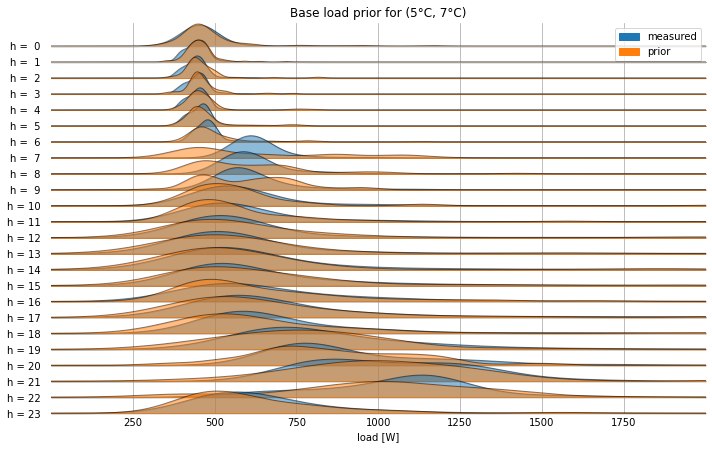

In [37]:
dfb = pd.concat([lb1.rename('prior'), lb.rename('measured')], axis=1)

joypy.joyplot(dfb, by=dfb.index.hour, column=[ 'measured', 'prior'], 
              linewidth=1, legend=True, labels=[f'h = {h:>2}' for h in np.arange(0,24)], x_range=[0,2000],
              fade=False, alpha=0.5, grid=True, figsize=(10,6), 
              ylim='own', overlap=0.7, color=[colors['base'], colors['prior_base']]);
plt.xlabel('load [W]');
plt.title('Base load prior for (5°C, 7°C)');
#plt.savefig('base_prior', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [38]:
mean_base = np.zeros(24)
for h in range(24):
    mean_base[h] = dfh[(dfh['Tbin']==tmin)&(dfh.index.hour==h)]['MHE'].mean()

In [39]:
lbh = pd.Series(
    [mean_base[h] for h in lb.index.hour],
    index=lb.index)

In [40]:
MAEh['base prior'] = mean_absolute_error(lb, lbh)
rMAEh['base prior'] = 100 * mean_absolute_error(lb, lbh) / df['MHE'].mean()
MAEd['base prior'] = mean_absolute_error(lb.resample('1d').mean(), lbh.resample('1d').mean())
rMAEd['base prior'] = 100 * mean_absolute_error(lb.resample('1d').mean(), lbh.resample('1d').mean()) / df['MHE'].mean()
MAEm['base prior'] = mean_absolute_error(lb.resample('1M').mean(), lbh.resample('1M').mean())
rMAEm['base prior'] = 100 * mean_absolute_error(lb.resample('1M').mean(), lbh.resample('1M').mean()) / df['MHE'].mean()

Ph['base prior'] = np.minimum(lbh, lb).sum() / lbh.sum() * 100
Rh['base prior'] = np.minimum(lbh, lb).sum() / lb.sum() * 100
F1h['base prior'] = 2 * Ph['base prior']*Rh['base prior'] / (Ph['base prior'] + Rh['base prior'])

CRPSh['base prior'] = ps.crps_ensemble(lb, [dfh[(dfh['Tbin']==tmin)&(dfh.index.hour==h)]['MHE'].sample(100, replace=True) for h in dfh.index.hour]).mean()

### Prior for the thermal component of the load

Having obtained an estimate of the base component, it is then possible to estimate the prior for the thermal component of the home's consumption using Approximate Bayesian Computation, as described in Section XXX. The resulting distribution is a function of both temperature and time of day; Figure TTT shows the comparison between the estimated and actual distributions of the heat loads for each hour of the day for days when the average outdoor temperature was between 5°C and 7°C. 

It can be seen that although the prior distributions are able to identify the mean values of the heat load for each hour of the day, they are characterized by an estimated uncertainty that is greater than the measured one. In Table XXX, it is also possible to evaluate the accuracy of the estimate of the thermal load component with the prior alone.

In [41]:
def get_priors(dfl, dfb, nsamples=10000):
    bmin = dfl.groupby(dfb).mean().argmin()
    nT = len(dfb.unique())
    
    mu_prior = np.zeros((24,nT))
    sd_prior = np.zeros((24,nT))
    
    for h in range(24):
        print(f'{h+1}/24')
        for b in range(nT):
            l = dfl[(dfl.index.hour==h) & (dfb==b)]
            lb = dfl[(dfl.index.hour==h) & (dfb==bmin)]

            mu = np.random.uniform(-500, 3500, nsamples)
            sd = np.random.uniform(0, 2000, nsamples)
            distance = np.zeros(nsamples)

            p, _ = np.histogram(l, bins=40, range=(-500, 3500))
            p = (p + 1.e-6) / (p + 1.e-6).sum()
                
            for i in range(nsamples):
                samples_base = np.random.choice(lb, 1000)
                lim_a, lim_b = (-500 - mu[i]) / sd[i], (3500 - mu[i]) / sd[i]
                samples_thermal = truncnorm.rvs(lim_a, lim_b, loc=mu[i], scale=sd[i], size=1000)
                
                q, _ = np.histogram(samples_base + samples_thermal, bins=40, range=(-500, 3500))
                q = (q + 1.e-6) / (q + 1.e-6).sum()
                
                distance[i] = (p * (np.log(p) - np.log(q))).sum()

            threshold = np.sort(distance)[int(nsamples / 100)]
            mu_prior[h,b] = mu[distance < threshold].mean()
            sd_prior[h,b] = sd[distance < threshold].mean()
    
    return mu_prior, sd_prior

In [42]:
# Calcolo il prior termico nell'intervallo (-500, 3500W) con risoluzione di 100W
mu_prior, sd_prior = get_priors(dfh['MHE'], dfh['Tbin'], nsamples=1000)
thermal_prior = np.zeros((40, 24, nT))
for h in range(24):
    for t in range(nT):
        for a, xa in enumerate(np.linspace(-500,3500,40,endpoint=False)):
            lim_a, lim_b = (-500 - mu_prior[h,t]) / sd_prior[h,t], (3500 - mu_prior[h,t]) / sd_prior[h,t]
            thermal_prior[a,h,t] = truncnorm(lim_a, lim_b, loc=mu_prior[h,t], scale=sd_prior[h,t]).pdf(xa)
            
thermal_prior /= thermal_prior.sum(axis=0)

1/24
2/24
3/24
4/24
5/24
6/24
7/24
8/24
9/24
10/24
11/24
12/24
13/24
14/24
15/24
16/24
17/24
18/24
19/24
20/24
21/24
22/24
23/24
24/24


In [43]:
lt1 = pd.Series(
    [np.random.choice(100*np.arange(-5,35), p=thermal_prior[:,h,t]) for h,t in zip(dfh.index.hour, dfh['Tbin'])],
    index=dfh.index).rename('prior')

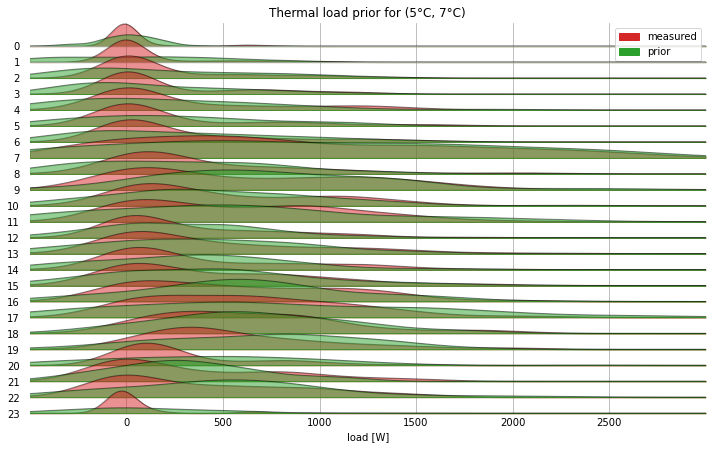

In [44]:
dft = pd.concat([lt1[(dfh['T']>5) & (dfh['T']<7)].rename('prior'), 
                 lt[(dfh['T']>5) & (dfh['T']<7)].rename('measured')], axis=1)
joypy.joyplot(dft, by=dft.index.hour, column=[ 'measured', 'prior'], 
              linewidth=1, legend=True, x_range=[-500,3000],
              fade=False, alpha=0.5, grid=True, figsize=(10,6), 
              ylim='own', overlap=0.7, color=[colors['thermal'], colors['prior_thermal']]);
plt.xlabel('load [W]');
plt.title('Thermal load prior for (5°C, 7°C)');
#plt.savefig('thermal_prior', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [45]:
thermal_mean = np.zeros((24, nT))
for h in range(24):
    for t in range(nT):
        thermal_mean[h,t] = (thermal_prior[:,h,t] * (100*np.arange(-5,35))).sum(axis=0)

In [46]:
lth = pd.Series([thermal_mean[h,t] for h,t in zip(dfh.index.hour, dfh['Tbin'])], index=dfh.index)

In [47]:
MAEh['thermal prior'] = mean_absolute_error(lt, lth)
rMAEh['thermal prior'] = 100 * mean_absolute_error(lt, lth) / df['MHE'].mean()
MAEd['thermal prior'] = mean_absolute_error(lt.resample('1d').mean(), lth.resample('1d').mean())
rMAEd['thermal prior'] = 100 * mean_absolute_error(lt.resample('1d').mean(), lth.resample('1d').mean()) / df['MHE'].mean()
MAEm['thermal prior'] = mean_absolute_error(lt.resample('1M').mean(), lth.resample('1M').mean())
rMAEm['thermal prior'] = 100 * mean_absolute_error(lt.resample('1M').mean(), lth.resample('1M').mean()) / df['MHE'].mean()

Ph['thermal prior'] = np.minimum(lbh, lb).sum() / lbh.sum() * 100
Rh['thermal prior'] = np.minimum(lbh, lb).sum() / lb.sum() * 100
F1h['thermal prior'] = 2 * Ph['thermal prior']*Rh['thermal prior'] / (Ph['thermal prior'] + Rh['thermal prior'])

CRPSh['thermal prior'] = ps.crps_ensemble(lt, [np.random.choice(100*np.arange(-5,35), p=thermal_prior[:,h,t], size=100) for h,t in zip(dfh.index.hour, dfh['Tbin'])]).mean()

### Thermal load posterior

From the estimated priors for the base and thermal components and from the knowledge of the aggregate load, the a posteriori probability distribution of the thermal load can be obtained.

Figure YYY shows the comparison of the actual and estimated a posteriori distribution of the heat load as a function of time of day for the days when the outdoor temperature is in the range of 5 - 7°C. The figure is analogous of the previous figure XXX, in which the a priori distribution was shown.
One can see the improved overlap between the measured and predicted distributions, with a clear improvement over what was obtained with the prior.

In [48]:
def get_posterior(prior):
    likelihood = np.zeros((50, 40, 24, nT))
    for h in range(24):
        h_lb, _ = np.histogram(dfh['MHE'][(dfh.index.hour==h) & (dfh['Tbin']==tmin)], bins=50, range=(0, 5000))
        for t in range(nT):
            for a, xa in enumerate(np.linspace(-500,3500,40,endpoint=False)):
                for b, xb in enumerate(np.linspace(0,5000,50,endpoint=False)):
                    likelihood[b,a,h,t] = h_lb[np.clip(int((xb - xa) / 100), 0,49)]
    
    evidence = np.zeros((50, 24, nT))
    for h in range(24):
        for t in range(nT):
            for b, xb in enumerate(np.linspace(0,5000,50,endpoint=False)):
                evidence[b,h,t] = (likelihood[b,:,h,t] * prior[:,h,t]).sum()
    
    posterior = np.zeros((40, 50, 24, nT))
    for h in range(24):
        for t in range(nT):
            for a, xa in enumerate(np.linspace(-500,3500,40,endpoint=False)):
                for b, xb in enumerate(np.linspace(0,5000,50,endpoint=False)):
                    posterior[a,b,h,t] = likelihood[b,a,h,t] * prior[a,h,t] / evidence[b,h,t] if evidence[b,h,t] > 0 else 0
    
    posterior_mean = np.zeros((50, 24, nT))
    for h in range(24):
        for t in range(nT):
            for b in range(50):
                posterior_mean[b,h,t] = (posterior[:,b,h,t] * (100*np.arange(-5,35) + 0)).sum(axis=0)
    
    return posterior, posterior_mean

In [49]:
thermal_posterior, thermal_mean = get_posterior(thermal_prior)
thermal_posterior += 1.0e-6
thermal_posterior /= thermal_posterior.sum(axis=0)

In [50]:
lb2 = pd.Series(
    [v - np.random.choice(100*np.arange(-5,35), p=thermal_posterior[:,l,h,t]) for v,l,h,t in zip(dfh['MHE'], (dfh['MHE']/100).astype(int).clip(0,49), dfh.index.hour, dfh['Tbin'])],
    index=dfh.index)

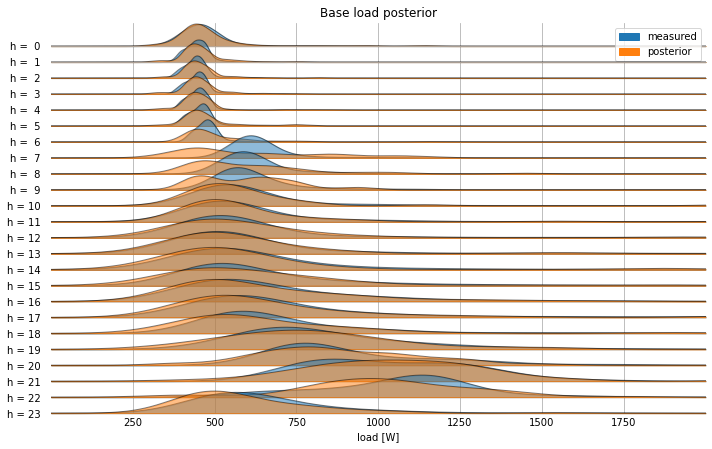

In [51]:
dfb = pd.concat([lb2.rename('posterior'), lb.rename('measured')], axis=1)

joypy.joyplot(dfb, by=dfb.index.hour, column=[ 'measured', 'posterior'], 
              linewidth=1, legend=True, labels=[f'h = {h:>2}' for h in np.arange(0,24)], x_range=[0,2000],
              fade=False, alpha=0.5, grid=True, figsize=(10,6), 
              ylim='own', overlap=0.7, color=[colors['base'], colors['posterior_base']]);
plt.xlabel('load [W]');
plt.title('Base load posterior');
#plt.savefig('base_posterior', dpi=300, bbox_inches='tight', pad_inches=0.1)

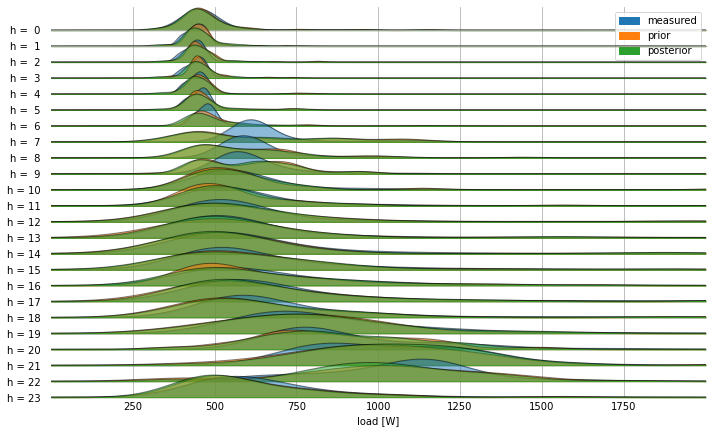

In [52]:
dfb = pd.concat([lb1.rename('prior'), lb2.rename('posterior'), lb.rename('measured')], axis=1)

joypy.joyplot(dfb, by=dfb.index.hour, column=[ 'measured', 'prior', 'posterior'], 
              linewidth=1, legend=True, labels=[f'h = {h:>2}' for h in np.arange(0,24)], x_range=[0,2000],
              fade=False, alpha=0.5, grid=True, figsize=(10,6), 
              ylim='own', overlap=1);
plt.xlabel('load [W]');


In [53]:
lt2 = pd.Series(
    [np.random.choice(100*np.arange(-5,35), p=thermal_posterior[:,l,h,t]) for l,h,t in zip((dfh['MHE']/100).astype(int).clip(0,49), dfh.index.hour, dfh['Tbin'])],
    index=dfh.index)

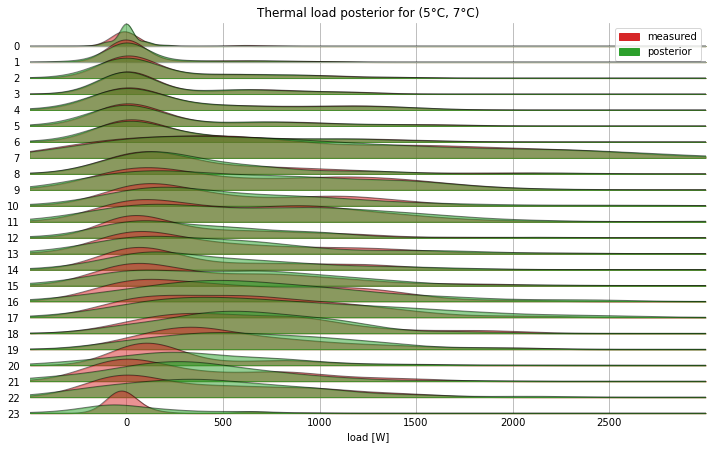

In [54]:
dft = pd.concat([lt2[(dfh['T']>5) & (dfh['T']<7)].rename('posterior'), 
                 lt[(dfh['T']>5) & (dfh['T']<7)].rename('measured')], axis=1)
joypy.joyplot(dft, by=dft.index.hour, column=[ 'measured', 'posterior'], 
              linewidth=1, legend=True, x_range=[-500,3000],
              fade=False, alpha=0.5, grid=True, figsize=(10,6), 
              ylim='own', overlap=0.7, color=[colors['thermal'], colors['posterior_thermal']]);plt.xlabel('load [W]');
plt.title('Thermal load posterior for (5°C, 7°C)');
#plt.savefig('thermal_posterior', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [55]:
lth = pd.Series(thermal_mean[(dfh['MHE']/100).astype(int).clip(0,49), dfh.index.hour, dfh['Tbin']], index=dfh.index)
#lth[lth < 0] = 0

In [56]:
lbh = dfh['MHE'] - lth

In [57]:
MAEh['base posterior'] = mean_absolute_error(lb, lbh)
rMAEh['base posterior'] = 100 * mean_absolute_error(lb, lbh) / df['MHE'].mean()
MAEd['base posterior'] = mean_absolute_error(lb.resample('1d').mean(), lbh.resample('1d').mean())
rMAEd['base posterior'] = 100 * mean_absolute_error(lb.resample('1d').mean(), lbh.resample('1d').mean()) / df['MHE'].mean()
MAEm['base posterior'] = mean_absolute_error(lb.resample('1M').mean(), lbh.resample('1M').mean())
rMAEm['base posterior'] = 100 * mean_absolute_error(lb.resample('1M').mean(), lbh.resample('1M').mean()) / df['MHE'].mean()

Ph['base posterior'] = np.minimum(lbh, lb).sum() / lbh.sum() * 100
Rh['base posterior'] = np.minimum(lbh, lb).sum() / lb.sum() * 100
F1h['base posterior'] = 2 * Ph['base posterior']*Rh['base posterior'] / (Ph['base posterior'] + Rh['base posterior'])

CRPSh['base posterior'] = ps.crps_ensemble(lb, [v - np.random.choice(100*np.arange(-5,35), p=thermal_posterior[:,l,h,t], size=100) for v,l,h,t in zip(dfh['MHE'], (dfh['MHE']/100).astype(int).clip(0,49), dfh.index.hour, dfh['Tbin'])]).mean()

In [58]:
MAEh['thermal posterior'] = mean_absolute_error(lt, lth)
rMAEh['thermal posterior'] = 100 * mean_absolute_error(lt, lth) / df['MHE'].mean()
MAEd['thermal posterior'] = mean_absolute_error(lt.resample('1d').mean(), lth.resample('1d').mean())
rMAEd['thermal posterior'] = 100 * mean_absolute_error(lt.resample('1d').mean(), lth.resample('1d').mean()) / df['MHE'].mean()
MAEm['thermal posterior'] = mean_absolute_error(lt.resample('1M').mean(), lth.resample('1M').mean())
rMAEm['thermal posterior'] = 100 * mean_absolute_error(lt.resample('1M').mean(), lth.resample('1M').mean()) / df['MHE'].mean()

Ph['thermal posterior'] = np.minimum(lbh, lb).sum() / lbh.sum() * 100
Rh['thermal posterior'] = np.minimum(lbh, lb).sum() / lb.sum() * 100
F1h['thermal posterior'] = 2 * Ph['thermal posterior']*Rh['thermal posterior'] / (Ph['thermal posterior'] + Rh['thermal posterior'])

CRPSh['thermal posterior'] = ps.crps_ensemble(lt, [np.random.choice(100*np.arange(-5,35), p=thermal_posterior[:,l,h,t], size=100) for l,h,t in zip((dfh['MHE']/100).astype(int).clip(0,49), dfh.index.hour, dfh['Tbin'])]).mean()

In [59]:
results = pd.DataFrame([MAEh, rMAEh, Ph, Rh, F1h, CRPSh, MAEd, rMAEd, MAEm, rMAEm, ], 
                       index=['MAEh', 'rMAEh', 'Precision', 'Recall', 'F1 score', 'CRPSh', 'MAEd', 'rMAEd', 'MAEm', 'rMAEm'])

print(results.round(2))

           base prior  thermal prior  base posterior  thermal posterior
MAEh           162.39         216.33          107.91             107.91
rMAEh           18.88          25.15           12.54              12.54
Precision       88.93          88.93           93.16              93.16
Recall          86.83          86.83           90.72              90.72
F1 score        87.86          87.86           91.92              91.92
CRPSh          121.79         164.19           87.71              87.63
MAEd            85.30          87.21           52.53              52.53
rMAEd            9.92          10.14            6.11               6.11
MAEm            25.44          40.77           23.18              23.18
rMAEm            2.96           4.74            2.69               2.69


In [60]:
print(results[['base prior', 'base posterior', 'thermal prior', 'thermal posterior']].round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  base prior &  base posterior &  thermal prior &  thermal posterior \\
\midrule
MAEh      &      162.39 &          107.91 &         216.33 &             107.91 \\
rMAEh     &       18.88 &           12.54 &          25.15 &              12.54 \\
Precision &       88.93 &           93.16 &          88.93 &              93.16 \\
Recall    &       86.83 &           90.72 &          86.83 &              90.72 \\
F1 score  &       87.86 &           91.92 &          87.86 &              91.92 \\
CRPSh     &      121.79 &           87.71 &         164.19 &              87.63 \\
MAEd      &       85.30 &           52.53 &          87.21 &              52.53 \\
rMAEd     &        9.92 &            6.11 &          10.14 &               6.11 \\
MAEm      &       25.44 &           23.18 &          40.77 &              23.18 \\
rMAEm     &        2.96 &            2.69 &           4.74 &               2.69 \\
\bottomrule
\end{tabular}



In [61]:
dfb = pd.concat([lb1.rename('prior'), lb2.rename('posterior'), lb.rename('measured')], axis=1)
dft = pd.concat([lt1.rename('prior'), lt2.rename('posterior'), lt.rename('measured')], axis=1)

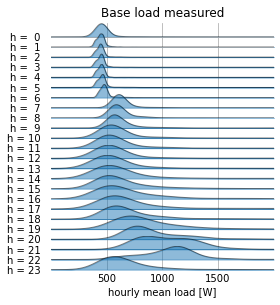

In [89]:
joypy.joyplot(dfb, by=dfb.index.hour, column=['measured'], 
              linewidth=1, legend=False, labels=[f'h = {h:>2}' for h in np.arange(0,24)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,2000], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['base']);
plt.xlabel('hourly mean load [W]');
plt.title('Base load measured');
plt.savefig('measured_base', dpi=300, bbox_inches='tight', pad_inches=0.1)

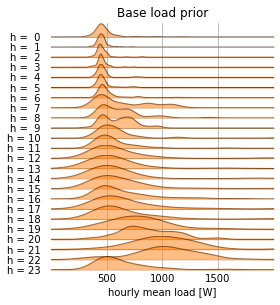

In [90]:
joypy.joyplot(dfb, by=dfb.index.hour, column=['prior'], 
              linewidth=1, legend=False, labels=[f'h = {h:>2}' for h in np.arange(0,24)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,2000], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['prior_base']);
plt.xlabel('hourly mean load [W]');
plt.title('Base load prior');
plt.savefig('prior_base', dpi=300, bbox_inches='tight', pad_inches=0.1)

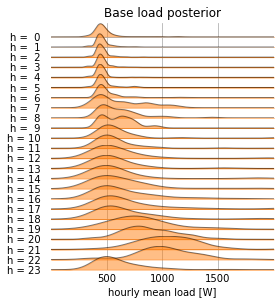

In [91]:
joypy.joyplot(dfb, by=dfb.index.hour, column=['posterior'], 
              linewidth=1, legend=False, labels=[f'h = {h:>2}' for h in np.arange(0,24)], 
              fade=False, alpha=0.5, grid=True, x_range=[0,2000], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['posterior_base']);
plt.xlabel('hourly mean load [W]');
plt.title('Base load posterior');
plt.savefig('posterior_base', dpi=300, bbox_inches='tight', pad_inches=0.1)

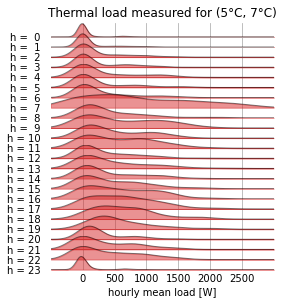

In [92]:
joypy.joyplot(dft[(dfh['T']>5) & (dfh['T']<7)], by=dft[(dfh['T']>5) & (dfh['T']<7)].index.hour, column=['measured'], 
              linewidth=1, legend=False, labels=[f'h = {h:>2}' for h in np.arange(0,24)], 
              fade=False, alpha=0.5, grid=True, x_range=[-500,3000], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['thermal']);
plt.xlabel('hourly mean load [W]');
plt.title('Thermal load measured for (5°C, 7°C)');
plt.savefig('measured_thermal', dpi=300, bbox_inches='tight', pad_inches=0.1)

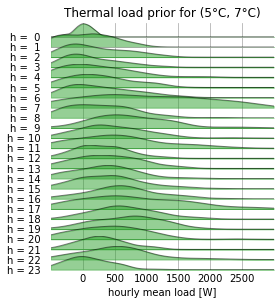

In [93]:
joypy.joyplot(dft[(dfh['T']>5) & (dfh['T']<7)], by=dft[(dfh['T']>5) & (dfh['T']<7)].index.hour, column=['prior'], 
              linewidth=1, legend=False, labels=[f'h = {h:>2}' for h in np.arange(0,24)], 
              fade=False, alpha=0.5, grid=True, x_range=[-500,3000], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['prior_thermal']);
plt.xlabel('hourly mean load [W]');
plt.title('Thermal load prior for (5°C, 7°C)');
plt.savefig('prior_thermal', dpi=300, bbox_inches='tight', pad_inches=0.1)

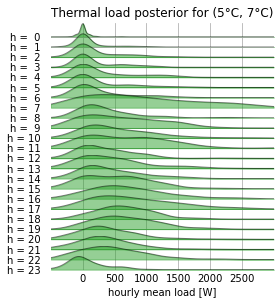

In [94]:
joypy.joyplot(dft[(dfh['T']>5) & (dfh['T']<7)], by=dft[(dfh['T']>5) & (dfh['T']<7)].index.hour, column=['posterior'], 
              linewidth=1, legend=False, labels=[f'h = {h:>2}' for h in np.arange(0,24)], 
              fade=False, alpha=0.5, grid=True, x_range=[-500,3000], figsize=(4,4), 
              ylim='own', range_style='all', overlap=0.2, color=colors['posterior_thermal']);
plt.xlabel('hourly mean load [W]');
plt.title('Thermal load posterior for (5°C, 7°C)');
plt.savefig('posterior_thermal', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Disaggregation examples

In the following figures we show some examples of application of the algorithm for different periods of the year, characterized by different values of the average outdoor temperature. The plots show the total load and the effective thermal load; the thermal load estimates obtained with the proposed procedure are also shown. 
Overall, a good accuracy can be noticed for all the periods considered. The procedure appears to be effective both in identifying the switching on of heating and cooling systems, and in estimating the value of the power absorbed by these systems even at hourly resolution, with a remarkable accuracy for a totally unsupervised procedure.

In [51]:
total = dfh['MHE']
measured = lt
measured[measured < 0] = 0
disaggregated = lth
disaggregated[disaggregated < 0] = 0

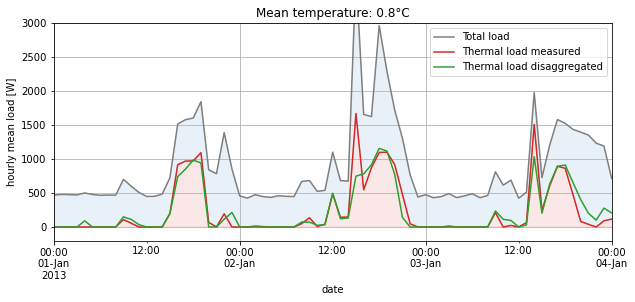

In [52]:
plt.figure(figsize=(10,4))
total.plot(label='Total load', c=colors['total'])
measured.plot(label='Thermal load measured', c=colors['thermal'])
disaggregated.plot(label='Thermal load disaggregated', c=colors['posterior_thermal'])
plt.fill_between(x=total.index, y1=total, y2=measured, alpha=0.1, color=colors['base'])
plt.fill_between(x=total.index, y1=measured.values, y2=0, alpha=0.1, color=colors['thermal'])
plt.legend()
plt.grid()
plt.title(f"Mean temperature: {dfh.loc['2013-01-01':'2013-01-03','T'].mean():0.1f}°C")
plt.xlim(datetime.datetime(2013,1,1), datetime.datetime(2013,1,4))
plt.ylim(-200, 3000);
plt.ylabel('hourly mean load [W]')
plt.savefig('example1', dpi=300, bbox_inches='tight', pad_inches=0.1)

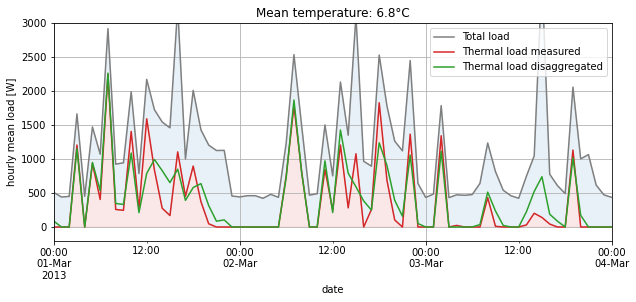

In [53]:
plt.figure(figsize=(10,4))
total.plot(label='Total load', c=colors['total'])
measured.plot(label='Thermal load measured', c=colors['thermal'])
disaggregated.plot(label='Thermal load disaggregated', c=colors['posterior_thermal'])
plt.fill_between(x=total.index, y1=total, y2=measured, alpha=0.1, color=colors['base'])
plt.fill_between(x=total.index, y1=measured.values, y2=0, alpha=0.1, color=colors['thermal'])
plt.legend()
plt.grid()
plt.title(f"Mean temperature: {dfh.loc['2013-03-01':'2013-03-03','T'].mean():0.1f}°C")
plt.xlim(datetime.datetime(2013,3,1), datetime.datetime(2013,3,4))
plt.ylim(-200, 3000);
plt.ylabel('hourly mean load [W]')
plt.savefig('example2', dpi=300, bbox_inches='tight', pad_inches=0.1)

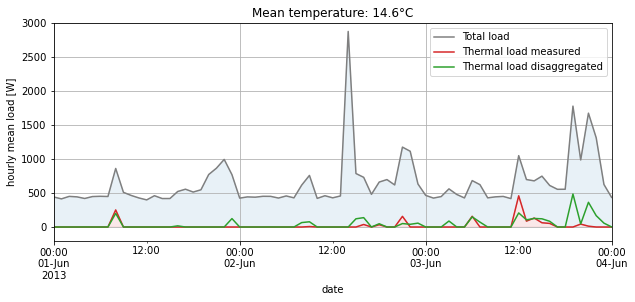

In [54]:
plt.figure(figsize=(10,4))
total.plot(label='Total load', c=colors['total'])
measured.plot(label='Thermal load measured', c=colors['thermal'])
disaggregated.plot(label='Thermal load disaggregated', c=colors['posterior_thermal'])
plt.fill_between(x=total.index, y1=total, y2=measured, alpha=0.1, color=colors['base'])
plt.fill_between(x=total.index, y1=measured.values, y2=0, alpha=0.1, color=colors['thermal'])
plt.legend()
plt.grid()
plt.title(f"Mean temperature: {dfh.loc['2013-06-01':'2013-06-03','T'].mean():0.1f}°C")
plt.xlim(datetime.datetime(2013,6,1), datetime.datetime(2013,6,4))
plt.ylim(-200, 3000);
plt.ylabel('hourly mean load [W]')
plt.savefig('example3', dpi=300, bbox_inches='tight', pad_inches=0.1)

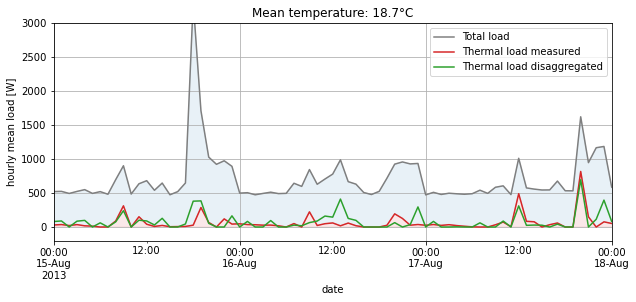

In [55]:
plt.figure(figsize=(10,4))
total.plot(label='Total load', c=colors['total'])
measured.plot(label='Thermal load measured', c=colors['thermal'])
disaggregated.plot(label='Thermal load disaggregated', c=colors['posterior_thermal'])
plt.fill_between(x=total.index, y1=total, y2=measured, alpha=0.1, color=colors['base'])
plt.fill_between(x=total.index, y1=measured.values, y2=0, alpha=0.1, color=colors['thermal'])
plt.legend()
plt.grid()
plt.title(f"Mean temperature: {dfh.loc['2013-08-15':'2013-08-18','T'].mean():0.1f}°C")
plt.xlim(datetime.datetime(2013,8,15), datetime.datetime(2013,8,18))
plt.ylim(-200, 3000);
plt.ylabel('hourly mean load [W]')
plt.savefig('example4', dpi=300, bbox_inches='tight', pad_inches=0.1)

## Discussion

The accuracy obtained can be compared with other results in the literature, in order to benchmark the proposed approach against other methodologies that have been applied. We have not found any work addressing the problem of the disaggregation of the entire thermal load on this dataset, the attention is often limited to white appliances, however some work has also addressed the disaggregation of the load due to the heat pump, which constitutes almost the entire thermal load and that in fact represents an excellent term of comparison.

The dataset is related to a single house, so all supervised methods, such as those based on deep learning, reach high accuracy but are unrealistic as they use part of the dataset for training of the model, and therefore it is assumed that it can measure in an intrusive way the appliance consumption of that specific house, and then fails the non-intrusiveness of the method. In order to properly evaluate the accuracy of a supervised method in non-intrusive disaggregation, it is necessary that the model training be conducted on a labeled dataset that does not include the house on which the test is performed. The most correct performance comparison in this case should therefore be done with unsupervised methods, such as those based on combinatorial analysis and the HMM technique.

In [bonfigli2018denoising] were compared a deep learning method based on a Denoising Auto Encoder type network, with the AFAMAP technique based on the HMM technique, the value of $F1$ found with the supervised method was 64.5% while with the unsupervised method the value of the same metric resulted 54.6%, while with the technique we proposed the value of this measure of accuracy stands at a value of 92.0%, therefore higher than both the unsupervised and the supervised approaches. The same working group obtained higher accuracies with supervised methods, but operating a filtering of the aggregated data, and constructing an aggregated data as the sum of only the devices on which the disaggregation is operated, with values however lower than those obtained with the proposed procedure [valenti2018exploiting].

In [zhao2018electricity] a disaggregation with a kNN method is performed for the hourly data, obtaining an MAE value equal to 224.2W for the consumption of the HVAc system in the examined dataset.
Also in [kaselimi2019multi] a supervised method based on convolutional and recurrent networks is compared with unsupervised methods, obtaining, for the heat pump of this dataset, a MAE value equal to 249.16W with a Combinatorial Optimization type method, 121.69W with a Factorial Hidden Markov Model method. The supervised method allows, as expected, to reach higher accuracies with a MAE value that drops to 94.79W. Further improvements are obtained in [kaselimi2020energan] where a supervised approach based on Generative Adversarial Network is used, by which the disaggregation of the heat pump is achieved with an MAE of 84.9W. With our methodology we obtained an hourly resolution MAE of 107.53W, which is lower than the values obtained with unsupervised methods and close to the errors that can be obtained with supervised methods.

- Bonfigli, R., Felicetti, A., Principi, E., Fagiani, M., Squartini, S., & Piazza, F. (2018). Denoising autoencoders for non-intrusive load monitoring: improvements and comparative evaluation. Energy and Buildings, 158, 1461-1474.
- Valenti, M., Bonfigli, R., Principi, E., & Squartini, S. (2018, July). Exploiting the reactive power in deep neural models for non-intrusive load monitoring. In 2018 International Joint Conference on Neural Networks (IJCNN) (pp. 1-8). IEEE.
- Kaselimi, M., Protopapadakis, E., Voulodimos, A., Doulamis, N., & Doulamis, A. (2019). Multi-channel recurrent convolutional neural networks for energy disaggregation. IEEE Access, 7, 81047-81056.
- Kaselimi, M., Voulodimos, A., Protopapadakis, E., Doulamis, N., & Doulamis, A. (2020, May). Energan: A generative adversarial network for energy disaggregation. In ICASSP 2020-2020 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP) (pp. 1578-1582). IEEE.

## Conclusions

We presented an unsupervised procedure for the disaggregation of the electrical consumption of a house, in the base and thermal components, respectively independent and dependent on external environmental conditions. 

The procedure, of probabilistic type, exploits Bayes' rule to obtain the estimate of the components starting from the knowledge of the aggregate load at a given time and from the a priori probability distributions of the two components, calculated through the analysis of the annual energy cycle and through an Approximate Bayesian Computation algorithm. The procedure is designed so that it can be applied automatically for a generic house for which hourly resolution of energy consumption is available for at least one year, in order to appreciate seasonal variations.

The procedure was then applied to the literature case of a house for which the data are available for the consumption of individual appliances, together with the aggregate household consumption.
The accuracy achieved in the disaggregation of loads is very good, not only for daily and monthly data of consumption but also for the hourly resolution data, with higher performance than other unsupervised methods and comparable to those obtained with algorithms based on deep learning and supervised, which require for the training of the model also the knowledge of the consumption of individual appliances.

Through the introduction of additional information in the estimation of the priority distributions of the loads is possible to further improve the accuracy of the method, it will also be interesting to assess the applicability of this Bayesian approach for other types of load and other types of users.